In [73]:
import os
import numpy as np
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import seaborn as sns
from intcr.pipeline.utils import load_data
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.manifold import TSNE

In [115]:
resultsfolder = '/Users/wbr/Box/Molecular_SysBio/projects/HELICAL/Iliana_papadopoulou/paper/clustering_valid/clustering'

In [116]:
levenshtein_matrix = load_data(os.path.join(resultsfolder,'clustering_preprocessing/levenshtein_matrix_1'))
levenshtein_matrix.shape

(410, 410)

In [118]:
silhuette_plot = []
for clustering_method in ['AgglomerativeClustering', 'KMedoids']:
    for k in [5,7,10,15,20]:
        file = os.path.join(resultsfolder, 'clustering_results', clustering_method+'_levenshtein_matrix_n_clusters_'+str(k)+'_split1_assignments')
        labels = load_data(file)
        score = silhouette_score(levenshtein_matrix, labels, metric='precomputed')
        nr_clusters = len(set([str(x) for x in labels]))
        silhuette_plot.append([nr_clusters, score, clustering_method])
        print(score, nr_clusters)
    

0.38327497157570456 5
0.43040576901059774 7
0.4434646551753085 10
0.5763696876330487 15
0.6589852827895771 20
0.16544776525035712 5
0.15403571076651534 7
0.07939248706641688 10
0.1379991245072713 15
0.0025344556324991907 20


In [119]:
labels_optics = load_data('OPTICS_levenshtein_matrix_split1_assignments')
score = silhouette_score(levenshtein_matrix, labels_optics, metric='precomputed')
nr_clusters = len(set([str(x) for x in labels_optics]))
print(nr_clusters, score)
silhuette_plot.append([nr_clusters, score, 'OPTICS'])
silhuette_plot = pd.DataFrame(silhuette_plot, columns=['k', 'score', 'Clustering Method'])
silhuette_plot

31 0.10481844010025272


,k,score,Clustering Method
0,5,0.383275,AgglomerativeClustering
1,7,0.430406,AgglomerativeClustering
2,10,0.443465,AgglomerativeClustering
3,15,0.576370,AgglomerativeClustering
4,20,0.658985,AgglomerativeClustering
5,5,0.165448,KMedoids
6,7,0.154036,KMedoids
7,10,0.079392,KMedoids
8,15,0.137999,KMedoids
9,20,0.002534,KMedoids


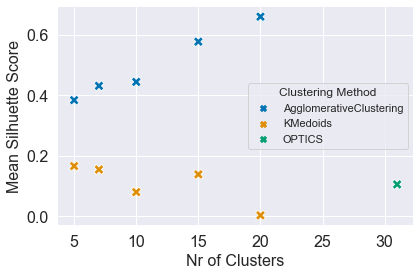

In [122]:
sns.set_theme() 
sns.set_palette("colorblind")
fig, ax1 = plt.subplots(1, 1, sharex=True, sharey=False)
splot1 = sns.scatterplot(x='k', y='score', data=silhuette_plot, hue='Clustering Method', cmap=cmap, s=100, markers=['X','X','X'], style='Clustering Method')
splot1.yaxis.grid(True, clip_on=False)     
ax1.set_ylabel('Mean Silhuette Score',fontsize=16)
ax1.tick_params(labelsize=16)                                     
ax1.set_xlabel('Nr of Clusters',fontsize=16)    
sns.despine(left=True, bottom=True)       
plt.tight_layout()

plt.savefig(os.path.join(resultsfolder, 'clustering_results', 'Silhuette.pdf'))

/Users/wbr/opt/anaconda3/envs/interpret_tcr/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/wbr/opt/anaconda3/envs/interpret_tcr/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/wbr/opt/anaconda3/envs/interpret_tcr/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
/Users/wbr/opt/anaconda3/envs/interpret_tcr/lib/python3.9/site-packages/sklearn/manif

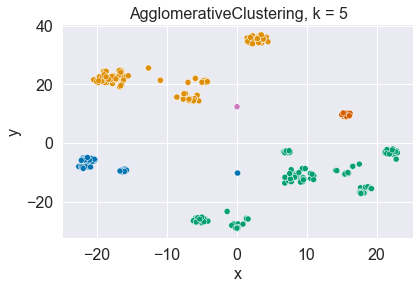

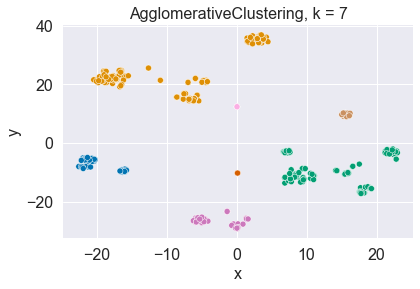

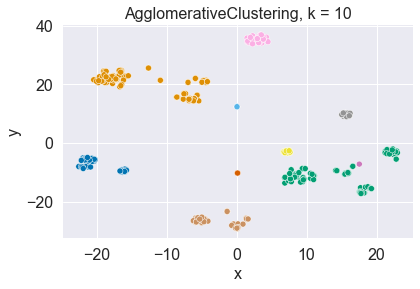

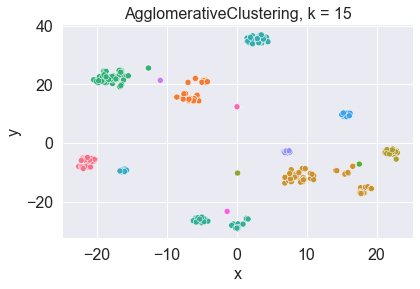

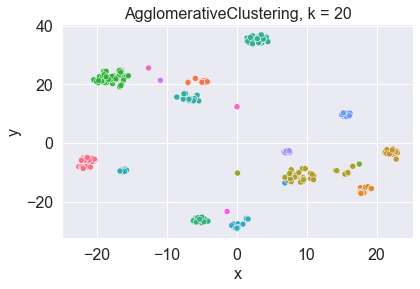

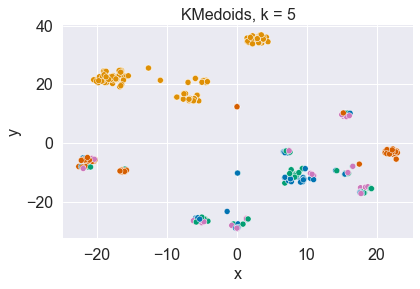

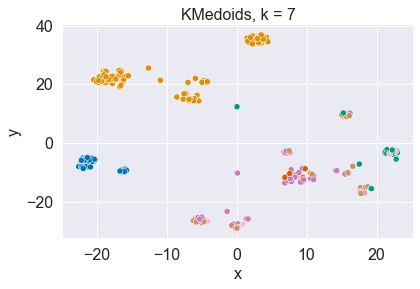

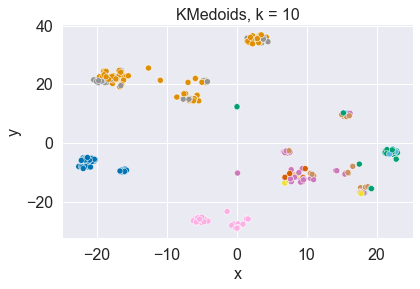

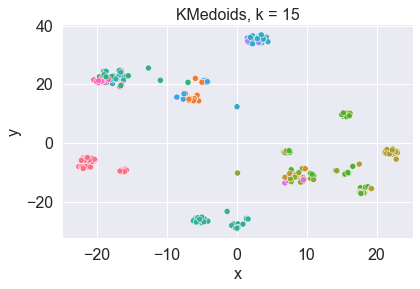

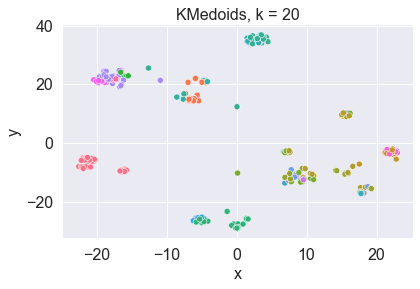

In [123]:
for clustering_method in ['AgglomerativeClustering', 'KMedoids']:
    for k in [5,7,10,15,20]:
        file = os.path.join(resultsfolder, 'clustering_results', clustering_method+'_levenshtein_matrix_n_clusters_'+str(k)+'_split1_assignments')
        labels = load_data(file)
        projections = TSNE(metric='precomputed', random_state=235).fit_transform(levenshtein_matrix)
        
        fig, ax1 = plt.subplots(1, 1, sharex=True, sharey=False)
        splot1 = sns.scatterplot(x=projections[:, 0], y=projections[:, 1], hue=[str(x) for x in labels], legend=None)
        splot1.yaxis.grid(True, clip_on=False)     
        ax1.set_ylabel('y',fontsize=16)
        ax1.tick_params(labelsize=16)                                     
        ax1.set_xlabel('x',fontsize=16)    
        sns.despine(left=True, bottom=True)       
        plt.tight_layout()
        
        plt.title(clustering_method+', k = '+str(k), fontsize=16)
        plt.savefig(os.path.join(resultsfolder, 'clustering_results', 'TSNE'+clustering_method+'_levenshtein_matrix_n_clusters_'+str(k)+'_split1_assignments.pdf'))
        



/Users/wbr/opt/anaconda3/envs/interpret_tcr/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/wbr/opt/anaconda3/envs/interpret_tcr/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/wbr/opt/anaconda3/envs/interpret_tcr/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


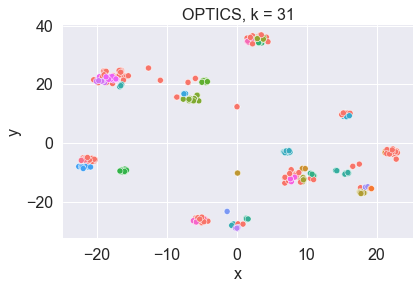

In [125]:
for clustering_method in ['OPTICS']:
    file = os.path.join(resultsfolder, 'clustering_results', clustering_method+'_levenshtein_matrix_split1_assignments')
    labels = load_data(file)
    projections = TSNE(metric='precomputed', random_state=235).fit_transform(levenshtein_matrix)
    
    fig, ax1 = plt.subplots(1, 1, sharex=True, sharey=False)
    splot1 = sns.scatterplot(x=projections[:, 0], y=projections[:, 1], hue=[str(x) for x in labels], legend=None)
    splot1.yaxis.grid(True, clip_on=False)     
    ax1.set_ylabel('y',fontsize=16)
    ax1.tick_params(labelsize=16)                                     
    ax1.set_xlabel('x',fontsize=16)    
    sns.despine(left=True, bottom=True)       
    plt.tight_layout()
    k = len(set([str(x) for x in labels]))
    plt.title(clustering_method+', k = '+str(k), fontsize=16)
    plt.savefig(os.path.join(resultsfolder, 'clustering_results','TSNE'+clustering_method+'_levenshtein_matrix_n_clusters_'+str(k)+'split1_assignments.pdf'))